# ¿Que hace falta para triunfar en Spotify?

Partiendo del dataset suministrado desarrolle un modelo de regresión que permita 
predecir el número de reproducciones que tendrá una canción a partir del resto de 
características. 

## Importe el fichero csv que se brinda y construya un dataframe a partir de él

Antes de comenzar a importar los datos del dataset, se importan primero todas las bibliotecas que se van a utilizar para completar la actividad. En concreto, para analizar y manipular los datos se va a utilizar principalmente Pandas y en algunos casos Numpy. La representación de gráficos se va a realizar con las bibliotecas de Python Seaborn y Matplotlib. Y para el desarrollo del modelo de regresión se van a utilizar los algoritmos y las funciones de la biblioteca de Scikit-Learn.

In [309]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Ahora es posible importar el fichero y crear el DataFrame con el nombre "songs_df". Para ello se utiliza el método `read_csv()` de Pandas y se especifica la codificación del alfabeto español("latin-1").

In [310]:
songs_df = pd.read_csv("spotify-2023.csv", encoding="latin-1")

Para visualizar las cinco primeras filas se utiliza `head()` y para ver la informaicón relativa al número de registros y el tipo de dato de cada variable se usa `info()`.

In [311]:
songs_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [312]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Se tiene un total de 943 registros y 24 columnas, las cuales representan la información relativa a cada canción según su nombre y artista, fecha de lanzamiento, la presencia en plataformas de streaming o atributos musicales como el tempo o la escala.

<br>

## Investigue si el dataset presenta datos perdidos y elimine los casos incompletos

Hay varias formas de comprobar si existen datos perdidos, en este caso, se va a utilizar la función `isnull()` seguida de `sum()` para calcular el valor acumulativo en cada variable.

In [313]:
songs_df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Las columnas "in_shazam_charts" y "key" tienen valores perdidos, por lo que se van a elimnar todos ellos con el método `dropna()` indicando `inplace=True` para que modifique el dataframe en sí, en lugar de crear uno nuevo.

Para no alterar el DataFrame que incluye los datos originales del dataset se crea una copia denominada "songs_df_copy" con el método `copy()`.

In [314]:
songs_df_copy = songs_df.copy()

In [315]:
songs_df_copy.dropna(subset=['in_shazam_charts', 'key'], inplace=True)

Se verifica que no hay ningún valor perdido con la función ya vista `isnull()` seguida de `any()` que devolverá "True" si hay
al menos un valor faltante en la columna o "False" si no lo hay.

In [316]:
songs_df_copy['in_shazam_charts'].isnull().any()

False

In [317]:
songs_df_copy['key'].isnull().any()

False

<br>

## Codifique las variables key y mode utilizando variables dummies o one hot encoding

Para codificar variables categóricas en numéricas, en concreto, en unos y ceros, se va a utilizar la técnica de "One-hot encoding" utilizando el método `getdummies()` de Pandas. La codificación crea una nueva columna por cada valor único y asigna un 1 si la fila tiene ese valor o un 0 si no lo tiene.

In [318]:
songs_df_key = pd.get_dummies(songs_df_copy['key'], prefix='KEY', prefix_sep='=', dtype='int')
songs_df_key

,KEY=A,KEY=A#,KEY=B,KEY=C#,KEY=D,KEY=D#,KEY=E,KEY=F,KEY=F#,KEY=G,KEY=G#
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
948,1,0,0,0,0,0,0,0,0,0,0
949,0,0,0,0,0,0,0,0,1,0,0
950,0,0,0,1,0,0,0,0,0,0,0
951,0,0,0,1,0,0,0,0,0,0,0


In [319]:
songs_df_mode = pd.get_dummies(songs_df_copy['mode'], prefix='MODE', prefix_sep='=', dtype='int')
songs_df_mode

,MODE=Major,MODE=Minor
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
948,1,0
949,1,0
950,1,0
951,1,0


Para combinar estas nuevas columnas con el dataframe "songs_df_copy" se utilizó la función `pd.concat()`.

In [320]:
songs_df_copy = pd.concat([songs_df_copy, songs_df_key, songs_df_mode], axis=1)

Con `columns` se verifica si se han incluido las variables "key" y "mode" codificadas.

In [321]:
songs_df_copy.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'KEY=A', 'KEY=A#', 'KEY=B', 'KEY=C#', 'KEY=D', 'KEY=D#', 'KEY=E',
       'KEY=F', 'KEY=F#', 'KEY=G', 'KEY=G#', 'MODE=Major', 'MODE=Minor'],
      dtype='object')

<br>

## Cree dos variables nuevas a partir de la variable streams, una utilizando un escalado logarítmico streams_log y otra utilizando un escalado estándar streams_ees

Para transformar la variable "streams" a su escala logarítmica se puede utilizar la función `np.log()` de Numpy, pero antes debe cambiarse el tipo de dato, ya que dicha función espera valores numéricos para calcular su logaritmo.

Con la función `pd.to_numeric()` se convierte la variable a numérica coaccionando aquellos errores que puedan ocurrir durante la transformación.

In [322]:
songs_df_copy['streams'] = pd.to_numeric(songs_df_copy['streams'], errors='coerce')

In [323]:
songs_df_copy['streams_log'] = np.log(songs_df_copy['streams'])

Para comparar y confirmar de manera visual que se ha realizado correctamente el escalado se representan ambas variables con `Seaborn` y `Matplotlib`.

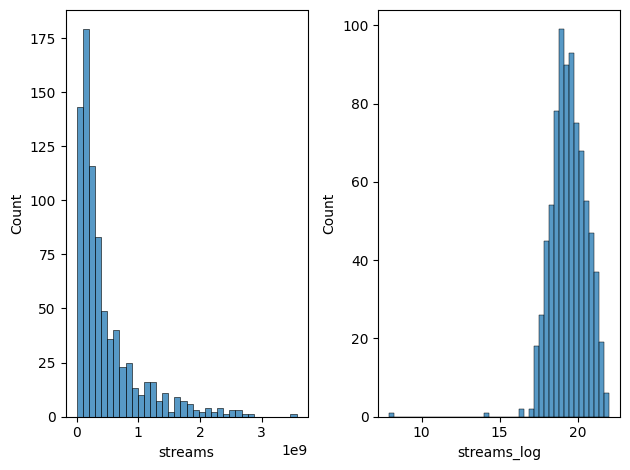

In [324]:
fig, ax = plt.subplots(1, 2)

sns.histplot(songs_df_copy['streams'], ax=ax[0])
sns.histplot(songs_df_copy['streams_log'], ax=ax[1])
plt.tight_layout()

Para estandarizar la variable "streams" se utiliza la clase "StandarScaler" de Scikit-Learn.

Primero, se inicializa la clase, y luego para entrenar y calcular la estandarización de "streams" es necesario reajustar su forma o dimensionalidad, ya que el método `fit_transform()` precisa de dos dimensiones para calcular la transformación. Por ello, extrayendo los valores de "streams" y utilizando el método `reshape()` de Numpy, se añade otro eje, logrando que todos los registros se encuentren en una solo columna.

In [325]:
songs_df_copy['streams'].shape[0], 1

(817, 1)

In [326]:
scaler = StandardScaler()
songs_df_copy['streams_ees'] = scaler.fit_transform(songs_df_copy['streams'].values.reshape(-1,1))

Antes de continuar con el siguiente ejercicio se revisa nuevamente si hay valores perdidos a causa de las transformaciones realizadas.

In [327]:
songs_df_copy.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 1
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
KEY=A                   0
KEY=A#                  0
KEY=B                   0
KEY=C#                  0
KEY=D                   0
KEY=D#                  0
KEY=E                   0
KEY=F                   0
KEY=F#                  0
KEY=G                   0
KEY=G#                  0
MODE=Major              0
MODE=Minor              0
streams_log             1
streams_ees 

Como se han identificado valores faltantes se van a eliminar de manera similar a como se hizo previamente.

In [328]:
songs_df_copy.dropna(inplace=True)

In [329]:
songs_df_copy.isnull().sum().any()

False

<br>

## Obtenga el mapa de calor con la correlación entre todas las variables. ¿Cuál de todas describe mejor el número de reproducciones (streams)?

Para representar la correlación de Pearson(método por defecto) las variables han de ser numéricas. Por lo tanto, primero es necesario separar las variables numéricas del dataframe mediante una lista de compresión en la que se verifica si el tipo de dato de la columna es entero(sin incluir las variables "dummies" para una mejor visualización) o decimal.

In [330]:
songs_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 952
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            816 non-null    object 
 1   artist(s)_name        816 non-null    object 
 2   artist_count          816 non-null    int64  
 3   released_year         816 non-null    int64  
 4   released_month        816 non-null    int64  
 5   released_day          816 non-null    int64  
 6   in_spotify_playlists  816 non-null    int64  
 7   in_spotify_charts     816 non-null    int64  
 8   streams               816 non-null    float64
 9   in_apple_playlists    816 non-null    int64  
 10  in_apple_charts       816 non-null    int64  
 11  in_deezer_playlists   816 non-null    object 
 12  in_deezer_charts      816 non-null    int64  
 13  in_shazam_charts      816 non-null    object 
 14  bpm                   816 non-null    int64  
 15  key                   816 no

In [331]:
numerical = [c for c in songs_df_copy if songs_df_copy[c].dtype=='int64' or songs_df_copy[c].dtype=='float64']
numerical

['artist_count',
 'released_year',
 'released_month',
 'released_day',
 'in_spotify_playlists',
 'in_spotify_charts',
 'streams',
 'in_apple_playlists',
 'in_apple_charts',
 'in_deezer_charts',
 'bpm',
 'danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%',
 'streams_log',
 'streams_ees']

Con Seaborn se representa el mapa de calor con la correlación de todas las variables numéricas calculada con el método `corr()` de Pandas.

<Axes: >

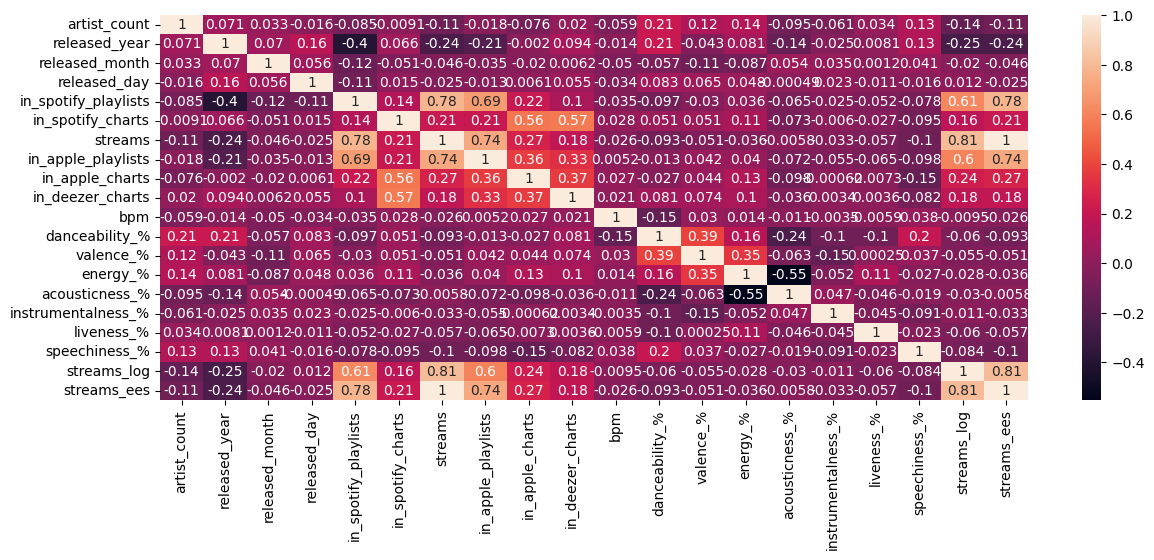

In [332]:
plt.figure(figsize=(14, 5))
sns.heatmap(songs_df_copy[numerical].corr(), annot=True)

La correlación se define en una escala de -1 a 1, donde 1 representa una relación perfectamente lineal entre dos variables. En el caso de la variable dependiente a predecir, 'streams', se observa una correlación "alta" con 'in_spotify_playlists' y 'in_apple_playlists'.

Lo que quiere decir que las canciones que se encuentran en las listas de reproducciones de spotify y apple reciben más reproducciones.

<br>

## Investigue si los datos presentan valores atípicos (anómalos), preséntelos en un boxplot e investigue si deben ser eliminados. Justifique

Utilizando Seaborn se representa el diagrama de cajas y bigotes para analizar los valores atípicos en las variables numéricas.

<Axes: >

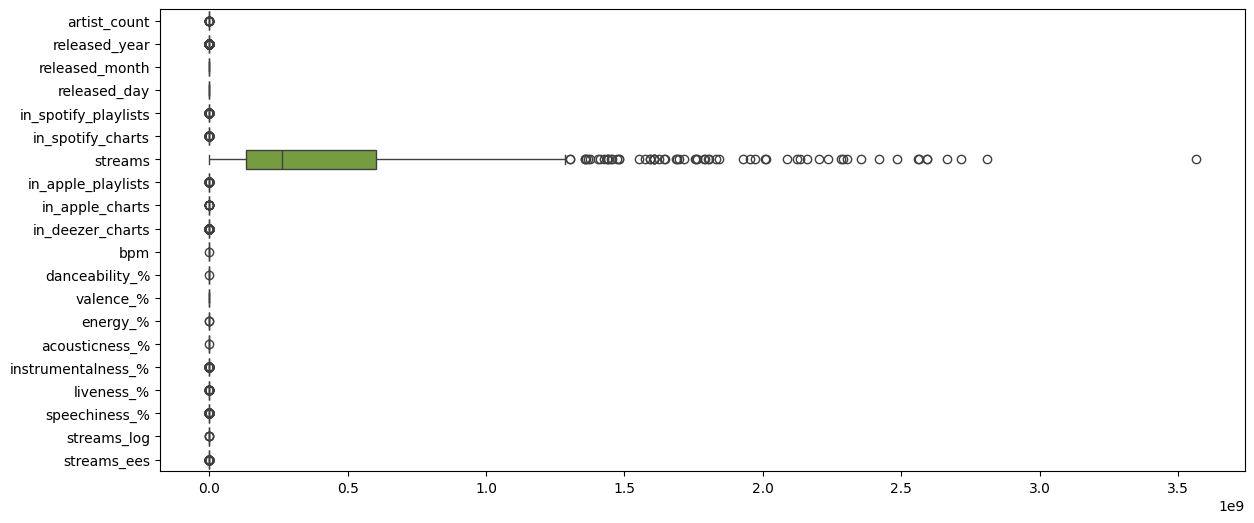

In [333]:
plt.figure(figsize=(14, 6))
sns.boxplot(songs_df_copy[numerical], orient='h')

La variable "streams" presenta valores atípicos por encima del tercer cuartil. Dado que la distribución de esta variable ya ha sido normalizada mediante la transformacion de su escala en las variables "streams_log" y "streams_ees" no hace falta eliminar los valores atípicos, puesto que "streams" no se va a utilizar para el cálculo del modelo de regresión. En caso de no haber transformado su escala se podría recortar los valores anómalos por encima del tercer cuartil con el método `clip()` de Pandas.

Debido que no es evidente a simple vista si las otras variables numéricas presentan valores atípicos en este gráfico, se ha creado la siguiente función `replace_outliers()`. Esta función permite remplazar los valores atípicos que no se encuentren dentro del rango intercuartílico(IQR) por valores perdidos utilizando la función `np.nan`. El resultado es un DataFrame, que se ha denominado "df_nan".

In [334]:
def replace_outliers(df):
    Q1, Q3 = np.percentile(df, [25 ,75])
    IQR = Q3-Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    replace = np.nan

    df = df.where((df >= lower) & (df <= upper), replace)
    return df

In [335]:
df_nan = songs_df_copy[numerical].apply(replace_outliers)
df_nan

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams_log,streams_ees
0,2.0,2023.0,7,14,553.0,NaN,141381703.0,43.0,NaN,NaN,125.0,80.0,89,83.0,31.0,0.0,8.0,4.0,18.766974,-0.626626
1,1.0,2023.0,3,23,1474.0,NaN,133716286.0,48.0,126.0,NaN,92.0,71.0,61,74.0,7.0,0.0,10.0,4.0,18.711231,-0.641288
2,1.0,2023.0,6,30,1397.0,NaN,140003974.0,94.0,NaN,NaN,138.0,51.0,32,53.0,17.0,0.0,31.0,6.0,18.757181,-0.629262
3,1.0,NaN,8,23,7858.0,NaN,800840817.0,116.0,NaN,NaN,170.0,55.0,58,72.0,11.0,0.0,11.0,15.0,20.501173,0.634757
4,1.0,2023.0,5,18,3133.0,NaN,303236322.0,84.0,133.0,NaN,144.0,65.0,23,80.0,14.0,NaN,11.0,6.0,19.530023,-0.317038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1.0,2022.0,11,3,953.0,0.0,91473363.0,61.0,13.0,1.0,144.0,60.0,24,39.0,57.0,0.0,8.0,3.0,18.331558,-0.722089
949,1.0,2022.0,10,21,1180.0,0.0,121871870.0,4.0,0.0,0.0,166.0,42.0,7,24.0,83.0,NaN,12.0,6.0,18.618481,-0.663944
950,2.0,2022.0,11,3,573.0,0.0,73513683.0,2.0,0.0,0.0,92.0,80.0,81,67.0,4.0,0.0,8.0,6.0,18.112982,-0.756441
951,3.0,2022.0,10,20,1320.0,0.0,133895612.0,29.0,26.0,0.0,97.0,82.0,67,77.0,8.0,0.0,12.0,5.0,18.712571,-0.640945


Seguidamente, se crea un nuevo DataFrame, "df1", en el cual se eliminan todas las filas con valores perdidos y se restablece el índice con `reset_index` para evitar posibles errores.

In [336]:
df1 = df_nan.dropna()
df1.reset_index(drop=True, inplace=True)
df1

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams_log,streams_ees
0,3.0,2023.0,6,22,332.0,26.0,86444842.0,11.0,163.0,4.0,140.0,65.0,87,74.0,22.0,0.0,42.0,4.0,18.275017,-0.731707
1,1.0,2023.0,7,7,516.0,38.0,52135248.0,73.0,119.0,1.0,123.0,69.0,82,76.0,6.0,0.0,6.0,3.0,17.769352,-0.797333
2,1.0,2023.0,6,22,250.0,26.0,78300654.0,16.0,149.0,5.0,130.0,79.0,96,86.0,9.0,0.0,9.0,9.0,18.176067,-0.747285
3,1.0,2023.0,1,31,2420.0,19.0,429829812.0,52.0,107.0,1.0,204.0,52.0,52,68.0,46.0,0.0,15.0,4.0,19.878900,-0.074896
4,2.0,2023.0,2,10,692.0,25.0,354495408.0,10.0,107.0,3.0,144.0,56.0,84,65.0,23.0,0.0,10.0,6.0,19.686206,-0.218992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,1.0,2022.0,10,21,1274.0,0.0,181382590.0,1.0,6.0,0.0,96.0,57.0,55,74.0,22.0,0.0,8.0,4.0,19.016119,-0.550114
354,1.0,2022.0,11,3,953.0,0.0,91473363.0,61.0,13.0,1.0,144.0,60.0,24,39.0,57.0,0.0,8.0,3.0,18.331558,-0.722089
355,2.0,2022.0,11,3,573.0,0.0,73513683.0,2.0,0.0,0.0,92.0,80.0,81,67.0,4.0,0.0,8.0,6.0,18.112982,-0.756441
356,3.0,2022.0,10,20,1320.0,0.0,133895612.0,29.0,26.0,0.0,97.0,82.0,67,77.0,8.0,0.0,12.0,5.0,18.712571,-0.640945


Además, se concatenan las variables categóricas excluidas del análisis de los valores atípicos en un nuevo DataFrame denominado "df2".

In [337]:
cat = songs_df_copy.select_dtypes(include='object')
cat.columns

Index(['track_name', 'artist(s)_name', 'in_deezer_playlists',
       'in_shazam_charts', 'key', 'mode'],
      dtype='object')

In [338]:
df2 = pd.concat([df1, cat], axis=1)
df2

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,...,liveness_%,speechiness_%,streams_log,streams_ees,track_name,artist(s)_name,in_deezer_playlists,in_shazam_charts,key,mode
0,3.0,2023.0,6.0,22.0,332.0,26.0,86444842.0,11.0,163.0,4.0,...,42.0,4.0,18.275017,-0.731707,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",45,826,B,Major
1,1.0,2023.0,7.0,7.0,516.0,38.0,52135248.0,73.0,119.0,1.0,...,6.0,3.0,17.769352,-0.797333,LALA,Myke Towers,58,382,C#,Major
2,1.0,2023.0,6.0,22.0,250.0,26.0,78300654.0,16.0,149.0,5.0,...,9.0,9.0,18.176067,-0.747285,vampire,Olivia Rodrigo,91,949,F,Major
3,1.0,2023.0,1.0,31.0,2420.0,19.0,429829812.0,52.0,107.0,1.0,...,15.0,4.0,19.878900,-0.074896,Cruel Summer,Taylor Swift,125,548,A,Major
4,2.0,2023.0,2.0,10.0,692.0,25.0,354495408.0,10.0,107.0,3.0,...,10.0,6.0,19.686206,-0.218992,WHERE SHE GOES,Bad Bunny,87,425,A,Minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,My Mind & Me,Selena Gomez,37,0,A,Major
949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Bigger Than The Whole Sky,Taylor Swift,8,0,F#,Major
950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,A Veces (feat. Feid),"Feid, Paulo Londra",7,0,C#,Major
951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,En La De Ella,"Feid, Sech, Jhayco",17,0,C#,Major


<br>

## Calcule los estadísticos descriptivos de las variables, agrupadas por la variable artist(s)_name

Con el método `groupby()` de Pandas es posible agrupar los estadísticos descriptivos de cada columna por el nombre del artista.

In [339]:
df2.groupby('artist(s)_name').describe()

artist_count                     \
                                                     count mean std  min  25%   
artist(s)_name                                                                  
(G)I-DLE                                               1.0  2.0 NaN  2.0  2.0   
21 Savage, Gunna                                       0.0  NaN NaN  NaN  NaN   
50 Cent                                                0.0  NaN NaN  NaN  NaN   
A$AP Rocky, Metro Boomin, Roisee                       1.0  1.0 NaN  1.0  1.0   
Abhijay Sharma, Riar Saab                              1.0  3.0 NaN  3.0  3.0   
...                                                    ...  ...  ..  ...  ...   
j-hope                                                 0.0  NaN NaN  NaN  NaN   
j-hope, J. Cole                                        1.0  2.0 NaN  2.0  2.0   
sped up 8282                                           1.0  2.0 NaN  2.0  2.0   
sped up nightcore, ARIZONATEARS, Lil Uzi Vert          1.0  2.0 NaN  2.0  2.0   
teto                                                   0.0  NaN NaN  NaN  NaN   

                                                             released_year  \
                                               50%  75%  max         count   
artist(s)_name                                                               
(G)I-DLE                                       2.0  2.0  2.0           1.0   
21 Savage, Gunna                               NaN  NaN  NaN           0.0   
50 Cent                                        NaN  NaN  NaN           0.0   
A$AP Rocky, Metro Boomin, Roisee               1.0  1.0  1.0           1.0   
Abhijay Sharma, Riar Saab                      3.0  3.0  3.0           1.0   
...                                            ...  ...  ...           ...   
j-hope                                         NaN  NaN  NaN           0.0   
j-hope, J. Cole                                2.0  2.0  2.0           1.0   
sped up 8282                                   2.0  2.0  2.0           1.0   
sped up nightcore, ARIZONATEARS, Lil Uzi Vert  2.0  2.0  2.0           1.0   
teto                                           NaN  NaN  NaN           0.0   

                                                       ... streams_log  \
                                                 mean  ...         75%   
artist(s)_name                                         ...               
(G)I-DLE                                       2021.0  ...   20.783388   
21 Savage, Gunna                                  NaN  ...         NaN   
50 Cent                                           NaN  ...         NaN   
A$AP Rocky, Metro Boomin, Roisee               2022.0  ...   18.127671   
Abhijay Sharma, Riar Saab                      2021.0  ...   20.009805   
...                                               ...  ...         ...   
j-hope                                            NaN  ...         NaN   
j-hope, J. Cole                                2022.0  ...   19.475964   
sped up 8282                                   2022.0  ...   19.101977   
sped up nightcore, ARIZONATEARS, Lil Uzi Vert  2022.0  ...   19.172612   
teto                                              NaN  ...         NaN   

                                                         streams_ees  \
                                                     max       count   
artist(s)_name                                                         
(G)I-DLE                                       20.783388         1.0   
21 Savage, Gunna                                     NaN         0.0   
50 Cent                                              NaN         0.0   
A$AP Rocky, Metro Boomin, Roisee               18.127671         1.0   
Abhijay Sharma, Riar Saab                      20.009805         1.0   
...                                                  ...         ...   
j-hope                                               NaN         0.0   
j-hope, J. Cole                                19.475964     

<br>

## Implemente un modelo de regresión para predecir la variable streams_log a partir del resto de variables (excluyendo streams_ees)

Antes de calcular la regresión se dividen los datos del dataframe en dos subconjuntos. Un 20% para el conjunto de prueba(test) definido por `x`, y el 80% restannte para el conjunto de entrenamiento(train) definido por `y`, utilizando la función `train_test_split()`. Estos porcentajes se definen por defecto, pero si se quisiera cambiar se puede que modificar el valor del parámetro `test_size`.

Para realizar el análisis por regresión múltiple se incluirán las variables "key" y "mode" previamente codificadas. Por consiguiente, se
separan nuevamente del DataFrame aquellas variables numéricas que incluyan estos valores para definir `x`, excluyendo la variable objetivo que se quiere predecir, "streams_log", y sus variables relacionadas.

In [340]:
num = [c for c in df1 if df1[c].dtype == 'int32' or df1[c].dtype == 'int64' or df1[c].dtype == 'float64']

In [341]:
x = df1[num].drop(columns=['streams', 'streams_log', 'streams_ees'])
y = df1['streams_log']

x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, random_state=0)

Seguidamente se inicializa el algoritmo de regresión lineal y se entrena el modelo con los datos de 
entrenamiento.

In [342]:
lr1 = LinearRegression()
lr1.fit(x1_train, y1_train)

LinearRegression()

Para comparar los datos de predicción del modelo resultante con los valores reales, se define el siguiente DataFrame "df_results".

In [343]:
y_pred = lr1.predict(x1_test)
df_results = pd.DataFrame({"Valor real": y1_test, "Predicción": y_pred})
df_results

,Valor real,Predicción
6,20.395365,19.521313
259,19.050742,18.782549
106,20.024554,19.833244
215,19.118680,19.053803
90,17.356534,17.951073
...,...,...
303,19.065819,19.406894
22,17.424051,18.212308
258,19.828843,19.518212
89,19.105168,18.691467


Con este DataFrame se puede generar un diagrama de dispersión para ver la relación lineal entre la predicción del modelo y los valores reales.

<Axes: xlabel='Valor real', ylabel='Predicción'>

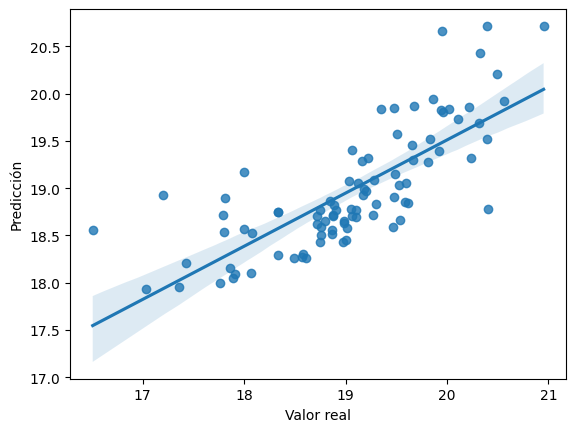

In [344]:
sns.regplot(data=df_results, x='Valor real', y='Predicción')

<br>

## Implemente un modelo de regresión para predecir la variable streams_ess a partir del resto de variables (excluyendo streams_log)

Para el cálculo del siguiente modelo se sigue el mismo procedimiento que en el anterior, cambiando únicamente la variable objetivo a predecir, `y`, por "streams_ees".

In [345]:
x = songs_df_copy[num].drop(columns=['streams', 'streams_log', 'streams_ees'])
y = songs_df_copy['streams_ees']

x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, random_state=0)

In [346]:
lr2 = LinearRegression()
lr2.fit(x2_train, y2_train)

LinearRegression()

In [347]:
y_pred = lr2.predict(x2_test)
df_results = pd.DataFrame({"Valor real": y2_test, "Predicción": y_pred})
df_results

,Valor real,Predicción
733,-0.409072,-0.053040
234,-0.677069,-0.339623
66,-0.123225,0.068123
577,-0.835924,-0.407078
31,-0.797029,-0.414010
...,...,...
894,-0.660881,-0.340455
915,-0.497086,-0.553509
570,0.269813,0.084463
666,-0.542414,-0.443285


<Axes: xlabel='Valor real', ylabel='Predicción'>

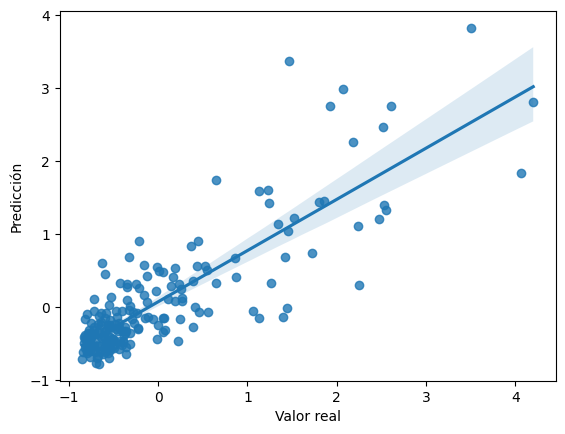

In [348]:
sns.regplot(data=df_results, x='Valor real', y='Predicción')

<br>

##  ¿Cuál de las dos codificaciones para la variable streams da mejores resultados?

Para determinar la fiabilidad del modelo se utiliza el coeficiente de determinación "R²", una medida estadística que indica qué tan cerca están los datos de la línea de regresión ajustada. En general, cuanto mayor es "R²" mejor se ajusta el modelo a los datos.

Con el método `score()` del algoritmo de regresión lineal se puede obtener el coefcicente de determinación. A continuación, se evalua el valor de "R²" en ambos modelos y en ambos subconjuntos de datos(train y test).

### Modelo de regresión para predecir la variable streams_log

In [349]:
print("R² para el conjunto de entrenamiento:", lr1.score(x1_train, y1_train))
print("R² para el conjunto de prueba:", lr1.score(x1_test, y1_test))

R² para el conjunto de entrenamiento: 0.6587566466095118
R² para el conjunto de prueba: 0.5827343003798491


### Modelo de regresión para predecir la variable streams_ees

In [350]:
print("R² para el conjunto de entrenamiento:", lr2.score(x2_train, y2_train))
print("R² para el conjunto de prueba:", lr2.score(x2_test, y2_test))

R² para el conjunto de entrenamiento: 0.7013907959587276
R² para el conjunto de prueba: 0.6969130110196566


El modelo para predecir la variable estandarizada de "streams" presenta un coeficiente de determinación superior en comparación con el primer modelo calculado. En conclusión, al utilizar "streams_ees" se obtienen mejores predicciones para estimar el número de reproducciones en Spotify.